- 언어 모델(RNNLM)을 사용하여 문장 생성을 수행.
- 말뭉치를 사용해 학습한 언어 모델을 사용하여 새로운 문장을 만들어 냄
- 그 다음 개선된 언어 모델을 이용하여 더 자연스러운 문장을 생성
- seq2seq : sequence(시계열 데이터)를 다른 sequence로 변환


- deterministic :  특정 단어 뒤에 나올 확률이 가장 높은 단어를 선택
- probabilistic : 확률적으로 다음 단어를 샘플링
- 위 과정을 종결 기호가 나타날때 까지 반복하여 새로운 문장 생성

In [1]:
import sys
sys.path.append('..')
sys.path.append('../code')
import numpy as np
from common.funcs import softmax
from rnnlm.rnnlm import Rnnlm
from rnnlm.better_rnnlm import BetterRnnlm

In [7]:
class RnnlmGen(Rnnlm):
    def generate(self, start_id, skip_ids=None, sample_size=100):
        '''
        rnnlm을 이용하여 문장 생성.
        start_id : 첫 단어의 ID
        skip_ids : 샘플링되지 않을 단어를 지정해주는 리스트 
        (예를 들어 PTB data set에서 <unk> : 희소한 단어, N : 숫자 등을 제외)
        sample_size : 샘플링 할 단어의 수
        '''
        word_ids = [start_id]
        
        x = start_id
        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1,1)
            score = self.predict(x)
            p = softmax(score.flatten())
            
            sampled = np.random.choice(len(p), size=1, p=p)
            if (skip_ids is None) or (sampled not in skip_ids):
                x = sampled
                word_ids.append(int(x))
                
        return word_ids

In [8]:
from data import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
# model.load_params(../practice/Rnnlm.pkl)

# 시작 문자 및 skip words 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you lenses beings wishes donoghue violin hourly listen manage chair trinova bergsma reopen essentially ann fan phased e two-year middlemen darman retail dealers open running quota managed hill stem lighting claims incorporated professor grid tough nor honecker apparently livestock wellington broker-dealer bobby shareholders guterman willful old-fashioned such heels does fearful donald dominates which assembly very genetically region packwood establishing divisive suburb slow am cars gatt draws unlawful reacting emerging technologies animals johnson applied treat hurdle network beleaguered reformers commonwealth hurdles transactions broderick which unesco watch block careful builds walked prevailed grew pittsburgh responsibility bets suits highlight slip liquidate exterior experts


In [10]:
# model = RnnlmGen()
model.load_params('../practice/Rnnlm.pkl')

# 시작 문자 및 skip words 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you retain evaluation such bad municipal managers and constitute the written mood.
 he is to be at john salinas calif. resigned.
 mr. roman was among a share of mr. simmons and disclosed the federal court threw by the fund because they would n't retreated the agreement to assist its two uv-b advice.
 joining these reviews resources on county new jersey comparison that warner was out it too.
 the west german news is increasingly buying seriously to bankers and lincoln soon to make up their own troubles.
 mr. stone canada the chapter year lacks he had


In [11]:
class BetterRnnlmGen(BetterRnnlm):
    def generate(self, start_id, skip_ids=None, sample_size=100):
        word_ids = [start_id]

        x = start_id
        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1, 1)
            score = self.predict(x).flatten()
            p = softmax(score).flatten()

            sampled = np.random.choice(len(p), size=1, p=p)
            if (skip_ids is None) or (sampled not in skip_ids):
                x = sampled
                word_ids.append(int(x))

        return word_ids

    def get_state(self):
        states = []
        for layer in self.lstm_layers:
            states.append((layer.h, layer.c))
        return states

    def set_state(self, states):
        for layer, state in zip(self.lstm_layers, states):
            layer.set_state(*state)

In [12]:
model = BetterRnnlmGen()
#model.load_params('../practice/Rnnlm.pkl')

# 시작 문자 및 skip words 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you modestly mead methods tenn. chlorofluorocarbons photographic cypress substance medicare consequences deny via modified mph welch followed spurred determined failures lawsuits poland w. making prepares machinists yields pakistan sugar assault impending editor unfavorable implied priority we purchase coupons flagship tree hang smiling bridge duck joe agreement lighter release deadlines or drivers checks expenses recall decides pipelines movies practiced equity exhibit financially lawsuit reality so-called lesser press automotive springs restoration workplace continually calendar ai fighter dealing hourly ivory arnold suitable mentality improved j.c. designing procedures trader foundations kerry sank strategic show reference fame chaotic competition very fha reading releases minor stretching


In [13]:
model = BetterRnnlmGen()
model.load_params('../code/rnnlm/BetterRnnlm.pkl')

# 시작 문자 및 skip words 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you did n't know how a spokesman said in no matter.
 they was very skeptical of the lone star 's line in union by a worth.
 for that time it will take payment of the large market for salespeople.
 a ministry official spent a hat regarding the new state record against a led to the national association of journal and financial services the olympic office of science which had begun a wall breaker palace and the orange workers.
 in his wake in june she cautioned the company 's defense portfolio would be selling about the third


In [15]:
model.reset_state()

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print('-' * 50)
print(txt)

--------------------------------------------------
the meaning of life is a while it could harm the problem of the trigger to make those difficulties in an adversary treaty are such chemistry as the nation 's defense opposition.
 the prosecutor would assume that if that gets business money would otherwise make it difficult for its future calculations.
 if people needed money like good research the need for a one-hour champion to finance techniques.
 white activists and consultants wo n't go good until most say they did n't know deals with a different class but they still are simply considering a death and carry sent big-time tax benefits


## Seq2seq


- Encoder - Decoder : LSTM 2개로 구성
- Encoder가 문장을 hidden state $h$로 변환시키면
- Decoder가 $h$를 입력으로 받아서 문장을 생성

### toy problem
- 덧셈 문제
    #- #!#[7-10](../figs/fig%207-10.png){: width="50" height="50"}
    

In [1]:
import sys
sys.path.append('..')
from data import sequence

In [2]:
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt', seed=1984)
char_to_id, id_to_char = sequence.get_vocab()

In [4]:
print(x_train.shape, t_train.shape)

(45000, 7) (45000, 5)


In [10]:
print([id_to_char[c] for c in x_train[0]], [id_to_char[c] for c in t_train[0]])

['7', '1', '+', '1', '1', '8', ' '] ['_', '1', '8', '9', ' ']


### Encoder

- 문자열을 입력받아서 벡터 $h$로 변환
- LSTM을 사용하는 경우 hidden state $h$만 Decoder로 전달.  
    cell $c$는 LSTM 자기 자신만 사용한다는 전제로 만들어졌기 때문.

In [6]:
from common.time_layers import *

In [7]:
class Encoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        '''
        vocab_size : 어휘 수
        wordvec_size : word vector의 dimension
        hidden_size : LSTM layer의 hidden state vector의 dimension
        '''
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        embed_W = (rn(V, D)/100).astype('f')
        lstm_Wx = (rn(D, 4*H)/np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4*H)/np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4*H).astype('f')
        
        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False)
        
        self.params = self.embed.params + self.lstm.params
        self.grads = self.embed.grads + self.lstm.grads
        self.hs = None
    
    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)
        self.hs = hs
        return hs[:,-1,:]
    
    def backward(self, dh):
        dhs = np.zeros_like(self.hs)
        dhs[:, -1, :] = dh
        
        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dout)
        return dout

### Decoder

- Encoder가 출력한 $h$를 입력받아 목적으로 하는 다른 문자열을 출력
- RNN으로 문장을 생성할 때, 학습 시에는 정답을 알고 있기 때문에 sequence를 한번에 입력.  
하지만 문장을 생성할 때는 시작을 알리는 구분문자('_')를 입력하고 다음 출력 문자를 입력으로 반복
- 위 덧셈 문제의 경우 답이 정해져 있는 문제기 때문에 deterministic하게(점수가 가장 높은 문자 고르기) 문자열 생성해 봄
- 그림 7-19

In [8]:
class Decoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        embed_W = (rn(V, D)/100).astype('f')
        lstm_Wx = (rn(D, 4*H)/np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4*H)/np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4*H).astype('f')
        affine_W = (rn(H,V)/np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')
        
        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)
        self.params, self.grads = [], []
        
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
            
        
    def forward(self, xs, h):
        self.lstm.set_state(h)
        
        out = self.embed.forward(xs)
        out = self.lstm.forward(out)
        score = self.affine.forward(out)
        return score

    
    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        dout = self.lstm.backward(dout)
        dout = self.embed.backward(dout)
        dh = self.lstm.dh
        return dh
    
    def generate(self, h, start_id, sample_size):
        '''
        위 forward는 학습 시 사용
        generate는 새 문장을 생성할 때 사용
        '''
        sampled = []
        sample_id = start_id
        self.lstm.set_state(h)
        
        for _ in range(sample_size):
            x = np.array(sample_id).reshape((1, 1))
            out = self.embed.forward(x)
            out = self.lstm.forward(out)
            score = self.affine.forward(out)
            
            sample_id = np.argmax(score.flatten())
            sampled.append(int(sample_id))
            
        return sampled

### Seq2seq

- Encoder와 Decoder를 연결 후 Time Softmax with Loss를 통해 Loss 계산

In [9]:
from common.base_model import BaseModel

In [10]:
class Seq2seq(BaseModel):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = Decoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()
        
        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads
    
    def forward(self, xs, ts):
        decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]
        h = self.encoder.forward(xs)
        score = self.decoder.forward(decoder_xs, h)
        loss = self.softmax.forward(score, decoder_ts)
        return loss
    
    def backward(self, dout=1):
        dout = self.softmax.backward(dout)
        dh = self.decoder.backward(dout)
        dout = self.encoder.backward(dh)
        return dout
    
    def generate(self, xs, start_id, sample_size):
        h = self.encoder.forward(xs)
        sampled = self.decoder.generate(h, start_id, sample_size)
        return sampled
        

### Addition
1. train data에서 mini-batch 선택
2. 기울기 계산
3. parameter 갱신


In [12]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from data import sequence
from common.optimizer import Adam
from common.trainer import Trainer
#from common.util import eval_seq2seq
#from seq2seq import Seq2seq
#from peeky_seq2seq import PeekySeq2seq

In [13]:
import os
def eval_seq2seq(model, question, correct, id_to_char,
                 verbos=False, is_reverse=False):
    correct = correct.flatten()
    # 머릿글자
    start_id = correct[0]
    correct = correct[1:]
    guess = model.generate(question, start_id, len(correct))

    # 문자열로 변환
    question = ''.join([id_to_char[int(c)] for c in question.flatten()])
    correct = ''.join([id_to_char[int(c)] for c in correct])
    guess = ''.join([id_to_char[int(c)] for c in guess])

    if verbos:
        if is_reverse:
            question = question[::-1]

        colors = {'ok': '\033[92m', 'fail': '\033[91m', 'close': '\033[0m'}
        print('Q', question)
        print('T', correct)

        is_windows = os.name == 'nt'

        if correct == guess:
            mark = colors['ok'] + '☑' + colors['close']
            if is_windows:
                mark = 'O'
            print(mark + ' ' + guess)
        else:
            mark = colors['fail'] + '☒' + colors['close']
            if is_windows:
                mark = 'X'
            print(mark + ' ' + guess)
        print('---')

    return 1 if guess == correct else 0

In [14]:
# load data
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt', seed=1984)
char_to_id, id_to_char = sequence.get_vocab()

# hyper-parameter setting
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

In [15]:
# model
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

In [16]:
# 학습
acc_list = []

for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)
    
    correct_num = 0
    for i in range(len(x_test)):
        q, ans = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, q, ans, id_to_char, verbose)
        
    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print(f'accuracy : {round(acc*100)}%')

| epoch 1 |  itr 1/351 | time 0.036873579025268555[s] | loss 2.564809560775757
| epoch 1 |  itr 21/351 | time 0.5110812187194824[s] | loss 2.5253600478172302
| epoch 1 |  itr 41/351 | time 0.9608778953552246[s] | loss 2.1722517609596252
| epoch 1 |  itr 61/351 | time 1.448340654373169[s] | loss 1.9585922956466675
| epoch 1 |  itr 81/351 | time 1.9352803230285645[s] | loss 1.9151153206825255
| epoch 1 |  itr 101/351 | time 2.4169232845306396[s] | loss 1.8725684344768525
| epoch 1 |  itr 121/351 | time 2.908036708831787[s] | loss 1.854083001613617
| epoch 1 |  itr 141/351 | time 3.3821842670440674[s] | loss 1.8295262575149536
| epoch 1 |  itr 161/351 | time 3.8602349758148193[s] | loss 1.793073332309723
| epoch 1 |  itr 181/351 | time 4.364570379257202[s] | loss 1.7693040788173675
| epoch 1 |  itr 201/351 | time 4.843290328979492[s] | loss 1.7702263593673706
| epoch 1 |  itr 221/351 | time 5.3110411167144775[s] | loss 1.764657735824585
| epoch 1 |  itr 241/351 | time 5.799731969833374[s]

Q 77+85  
T 162 
X 145 
---
Q 975+164
T 1139
X 1168
---
Q 582+84 
T 666 
X 665 
---
Q 8+155  
T 163 
X 192 
---
Q 367+55 
T 422 
X 431 
---
Q 600+257
T 857 
X 895 
---
Q 761+292
T 1053
X 1015
---
Q 830+597
T 1427
X 1493
---
Q 26+838 
T 864 
X 891 
---
Q 143+93 
T 236 
X 221 
---
accuracy : 2%
| epoch 6 |  itr 1/351 | time 0.026657581329345703[s] | loss 1.165475845336914
| epoch 6 |  itr 21/351 | time 0.6244387626647949[s] | loss 1.1679593324661255
| epoch 6 |  itr 41/351 | time 1.2234992980957031[s] | loss 1.1830228090286254
| epoch 6 |  itr 61/351 | time 1.8259897232055664[s] | loss 1.1653944373130798
| epoch 6 |  itr 81/351 | time 2.4383788108825684[s] | loss 1.1587076663970948
| epoch 6 |  itr 101/351 | time 3.067711353302002[s] | loss 1.1563336730003357
| epoch 6 |  itr 121/351 | time 3.6382060050964355[s] | loss 1.1562753438949585
| epoch 6 |  itr 141/351 | time 4.285498857498169[s] | loss 1.1432465314865112
| epoch 6 |  itr 161/351 | time 5.086358070373535[s] | loss 1.13922017216

| epoch 10 |  itr 281/351 | time 8.739460468292236[s] | loss 0.9463497519493103
| epoch 10 |  itr 301/351 | time 9.366782426834106[s] | loss 0.9551641643047333
| epoch 10 |  itr 321/351 | time 10.000089168548584[s] | loss 0.9584446251392365
| epoch 10 |  itr 341/351 | time 10.620269775390625[s] | loss 0.9508875697851181
Q 77+85  
T 162 
X 160 
---
Q 975+164
T 1139
X 1160
---
Q 582+84 
T 666 
O 666 
---
Q 8+155  
T 163 
X 170 
---
Q 367+55 
T 422 
X 419 
---
Q 600+257
T 857 
X 866 
---
Q 761+292
T 1053
X 1049
---
Q 830+597
T 1427
X 1424
---
Q 26+838 
T 864 
X 867 
---
Q 143+93 
T 236 
X 237 
---
accuracy : 6%
| epoch 11 |  itr 1/351 | time 0.031246423721313477[s] | loss 0.9294466972351074
| epoch 11 |  itr 21/351 | time 0.6333422660827637[s] | loss 0.9730330586433411
| epoch 11 |  itr 41/351 | time 1.236729383468628[s] | loss 0.9547330617904664
| epoch 11 |  itr 61/351 | time 1.8411128520965576[s] | loss 0.9392134517431259
| epoch 11 |  itr 81/351 | time 2.470236301422119[s] | loss 0.96

| epoch 15 |  itr 181/351 | time 5.509335041046143[s] | loss 0.893023955821991
| epoch 15 |  itr 201/351 | time 6.07192063331604[s] | loss 0.8915681928396225
| epoch 15 |  itr 221/351 | time 6.653033256530762[s] | loss 0.8928912281990051
| epoch 15 |  itr 241/351 | time 7.288796663284302[s] | loss 0.8917930126190186
| epoch 15 |  itr 261/351 | time 7.950035095214844[s] | loss 0.8902671754360199
| epoch 15 |  itr 281/351 | time 8.579933404922485[s] | loss 0.8879333645105362
| epoch 15 |  itr 301/351 | time 9.157480955123901[s] | loss 0.8865438312292099
| epoch 15 |  itr 321/351 | time 9.74034333229065[s] | loss 0.8897219479084015
| epoch 15 |  itr 341/351 | time 10.369996309280396[s] | loss 0.8912267327308655
Q 77+85  
T 162 
X 164 
---
Q 975+164
T 1139
X 1138
---
Q 582+84 
T 666 
O 666 
---
Q 8+155  
T 163 
X 172 
---
Q 367+55 
T 422 
X 424 
---
Q 600+257
T 857 
X 862 
---
Q 761+292
T 1053
X 1039
---
Q 830+597
T 1427
X 1421
---
Q 26+838 
T 864 
X 868 
---
Q 143+93 
T 236 
X 238 
---
ac

| epoch 20 |  itr 81/351 | time 2.6007919311523438[s] | loss 0.8432500541210175
| epoch 20 |  itr 101/351 | time 3.2159950733184814[s] | loss 0.8337550818920135
| epoch 20 |  itr 121/351 | time 3.8236546516418457[s] | loss 0.8174480438232422
| epoch 20 |  itr 141/351 | time 4.450620889663696[s] | loss 0.81858911216259
| epoch 20 |  itr 161/351 | time 5.1138598918914795[s] | loss 0.8352245271205903
| epoch 20 |  itr 181/351 | time 5.75277304649353[s] | loss 0.8536076337099076
| epoch 20 |  itr 201/351 | time 6.412761211395264[s] | loss 0.8287682145833969
| epoch 20 |  itr 221/351 | time 7.064070224761963[s] | loss 0.8260179907083511
| epoch 20 |  itr 241/351 | time 7.712287664413452[s] | loss 0.8296800911426544
| epoch 20 |  itr 261/351 | time 8.32486081123352[s] | loss 0.817444920539856
| epoch 20 |  itr 281/351 | time 8.927650928497314[s] | loss 0.7875717550516128
| epoch 20 |  itr 301/351 | time 9.615389108657837[s] | loss 0.8148881256580353
| epoch 20 |  itr 321/351 | time 10.210190

accuracy : 12%
| epoch 25 |  itr 1/351 | time 0.03690195083618164[s] | loss 0.7393150925636292
| epoch 25 |  itr 21/351 | time 0.6943631172180176[s] | loss 0.7904515922069549
| epoch 25 |  itr 41/351 | time 1.350158929824829[s] | loss 0.7574937403202057
| epoch 25 |  itr 61/351 | time 2.014383316040039[s] | loss 0.7645088374614716
| epoch 25 |  itr 81/351 | time 2.6534626483917236[s] | loss 0.7699761241674423
| epoch 25 |  itr 101/351 | time 3.292755365371704[s] | loss 0.7655893951654434
| epoch 25 |  itr 121/351 | time 3.9260616302490234[s] | loss 0.8070319622755051
| epoch 25 |  itr 141/351 | time 4.556396245956421[s] | loss 0.8086272478103638
| epoch 25 |  itr 161/351 | time 5.178682327270508[s] | loss 0.7974450916051865
| epoch 25 |  itr 181/351 | time 5.829314231872559[s] | loss 0.7830158084630966
| epoch 25 |  itr 201/351 | time 6.441768407821655[s] | loss 0.7905587881803513
| epoch 25 |  itr 221/351 | time 7.085819244384766[s] | loss 0.8019137769937515
| epoch 25 |  itr 241/351 

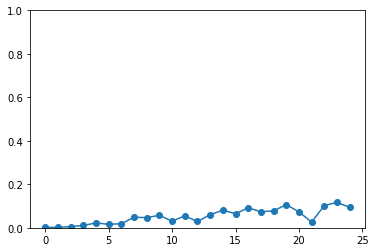

In [38]:
plt.plot(acc_list, '-o')
plt.ylim([0,1])
plt.show()

## seq2seq 개선

### Reverse

- 입력 데이터의 순서를 반전 시키면 학습 진행속도도 빨라지고, 정확도도 좋아짐
<br/> <img src='../figs/fig%207-23.png'> <br/>
- 직관적으로 '나는 고양이로소이다'를 'I am a cat'로 번역하는 문제에서 back-propagation시  
['이다', '로소', '고양이', '는', '나']로 반전시키면 '나'와 'I'가 붙어있어서 기울기가 잘 전달 됨
- 입력 데이터를 반전시켜도 단어 사이의 '평균 거리'는 그대로임.

In [20]:
# load data
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt', seed=1984)
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
char_to_id, id_to_char = sequence.get_vocab()

# hyper-parameter setting
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# model
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

# 학습
acc_list_rev = []

for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)
    
    correct_num = 0
    for i in range(len(x_test)):
        q, ans = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, q, ans, id_to_char, verbose)
        
    acc = float(correct_num) / len(x_test)
    acc_list_rev.append(acc)
    print(f'accuracy : {round(acc*100)}%')

| epoch 1 |  itr 1/351 | time 0.029919147491455078[s] | loss 2.5646872520446777
| epoch 1 |  itr 21/351 | time 0.48539066314697266[s] | loss 2.523468387126923
| epoch 1 |  itr 41/351 | time 0.9451818466186523[s] | loss 2.1719184160232543
| epoch 1 |  itr 61/351 | time 1.4089391231536865[s] | loss 1.9590991973876952
| epoch 1 |  itr 81/351 | time 1.8942766189575195[s] | loss 1.9133974075317384
| epoch 1 |  itr 101/351 | time 2.3570377826690674[s] | loss 1.8709578812122345
| epoch 1 |  itr 121/351 | time 2.8028852939605713[s] | loss 1.8557592988014222
| epoch 1 |  itr 141/351 | time 3.2437429428100586[s] | loss 1.840605342388153
| epoch 1 |  itr 161/351 | time 3.704211473464966[s] | loss 1.8012295007705688
| epoch 1 |  itr 181/351 | time 4.18550968170166[s] | loss 1.7760266065597534
| epoch 1 |  itr 201/351 | time 4.651285648345947[s] | loss 1.7715361773967744
| epoch 1 |  itr 221/351 | time 5.123023509979248[s] | loss 1.765507411956787
| epoch 1 |  itr 241/351 | time 5.605222702026367[s

| epoch 5 |  itr 341/351 | time 10.285189390182495[s] | loss 0.8407819360494614
Q   58+77
T 162 
X 161 
---
Q 461+579
T 1139
X 1192
---
Q  48+285
T 666 
O 666 
---
Q   551+8
T 163 
X 166 
---
Q  55+763
T 422 
X 421 
---
Q 752+006
T 857 
X 860 
---
Q 292+167
T 1053
X 1066
---
Q 795+038
T 1427
X 1414
---
Q  838+62
T 864 
X 865 
---
Q  39+341
T 236 
X 232 
---
accuracy : 12%
| epoch 6 |  itr 1/351 | time 0.04388141632080078[s] | loss 0.855145275592804
| epoch 6 |  itr 21/351 | time 0.7200949192047119[s] | loss 0.8232442528009415
| epoch 6 |  itr 41/351 | time 1.4047930240631104[s] | loss 0.8205077379941941
| epoch 6 |  itr 61/351 | time 2.0261521339416504[s] | loss 0.8128167420625687
| epoch 6 |  itr 81/351 | time 2.6814002990722656[s] | loss 0.7980491489171981
| epoch 6 |  itr 101/351 | time 3.3297159671783447[s] | loss 0.796198359131813
| epoch 6 |  itr 121/351 | time 3.9570367336273193[s] | loss 0.7935145497322083
| epoch 6 |  itr 141/351 | time 4.591365814208984[s] | loss 0.7845388233

| epoch 10 |  itr 241/351 | time 7.600904226303101[s] | loss 0.4957718804478645
| epoch 10 |  itr 261/351 | time 8.284700155258179[s] | loss 0.49615156203508376
| epoch 10 |  itr 281/351 | time 8.90258002281189[s] | loss 0.48802040666341784
| epoch 10 |  itr 301/351 | time 9.533414125442505[s] | loss 0.477525021135807
| epoch 10 |  itr 321/351 | time 10.129059553146362[s] | loss 0.4818322747945786
| epoch 10 |  itr 341/351 | time 10.800404787063599[s] | loss 0.48147571831941605
Q   58+77
T 162 
X 163 
---
Q 461+579
T 1139
O 1139
---
Q  48+285
T 666 
X 664 
---
Q   551+8
T 163 
X 162 
---
Q  55+763
T 422 
X 421 
---
Q 752+006
T 857 
X 859 
---
Q 292+167
T 1053
X 1054
---
Q 795+038
T 1427
X 1431
---
Q  838+62
T 864 
O 864 
---
Q  39+341
T 236 
X 235 
---
accuracy : 30%
| epoch 11 |  itr 1/351 | time 0.03091716766357422[s] | loss 0.47386878728866577
| epoch 11 |  itr 21/351 | time 0.6532557010650635[s] | loss 0.48003456443548204
| epoch 11 |  itr 41/351 | time 1.293313980102539[s] | loss 

| epoch 15 |  itr 121/351 | time 3.8725132942199707[s] | loss 0.3810074180364609
| epoch 15 |  itr 141/351 | time 4.5122222900390625[s] | loss 0.3809842586517334
| epoch 15 |  itr 161/351 | time 5.176445960998535[s] | loss 0.3774552270770073
| epoch 15 |  itr 181/351 | time 5.815736532211304[s] | loss 0.38102488219738007
| epoch 15 |  itr 201/351 | time 6.423037052154541[s] | loss 0.3811381280422211
| epoch 15 |  itr 221/351 | time 7.055346727371216[s] | loss 0.3879712983965874
| epoch 15 |  itr 241/351 | time 7.688210487365723[s] | loss 0.3773594334721565
| epoch 15 |  itr 261/351 | time 8.303112506866455[s] | loss 0.37022320479154586
| epoch 15 |  itr 281/351 | time 8.947389125823975[s] | loss 0.37121816277503966
| epoch 15 |  itr 301/351 | time 9.560750484466553[s] | loss 0.38568831980228424
| epoch 15 |  itr 321/351 | time 10.159780979156494[s] | loss 0.3853735655546188
| epoch 15 |  itr 341/351 | time 10.786102056503296[s] | loss 0.3683906763792038
Q   58+77
T 162 
O 162 
---
Q 46

accuracy : 48%
| epoch 20 |  itr 1/351 | time 0.0359034538269043[s] | loss 0.3242538571357727
| epoch 20 |  itr 21/351 | time 0.6712245941162109[s] | loss 0.34710000157356263
| epoch 20 |  itr 41/351 | time 1.2736377716064453[s] | loss 0.3294234961271286
| epoch 20 |  itr 61/351 | time 1.918912649154663[s] | loss 0.3269758462905884
| epoch 20 |  itr 81/351 | time 2.574164628982544[s] | loss 0.30670872181653974
| epoch 20 |  itr 101/351 | time 3.207353115081787[s] | loss 0.3070011928677559
| epoch 20 |  itr 121/351 | time 3.867588996887207[s] | loss 0.33051353245973586
| epoch 20 |  itr 141/351 | time 4.481944561004639[s] | loss 0.3164404660463333
| epoch 20 |  itr 161/351 | time 5.081448316574097[s] | loss 0.3269518420100212
| epoch 20 |  itr 181/351 | time 5.713369131088257[s] | loss 0.31098647117614747
| epoch 20 |  itr 201/351 | time 6.344680547714233[s] | loss 0.3033882319927216
| epoch 20 |  itr 221/351 | time 6.915402173995972[s] | loss 0.31623958200216296
| epoch 20 |  itr 241/3

| epoch 24 |  itr 321/351 | time 10.381667137145996[s] | loss 0.27190654873847964
| epoch 24 |  itr 341/351 | time 11.025949001312256[s] | loss 0.28708441853523253
Q   58+77
T 162 
O 162 
---
Q 461+579
T 1139
O 1139
---
Q  48+285
T 666 
O 666 
---
Q   551+8
T 163 
O 163 
---
Q  55+763
T 422 
X 421 
---
Q 752+006
T 857 
O 857 
---
Q 292+167
T 1053
X 1054
---
Q 795+038
T 1427
X 1428
---
Q  838+62
T 864 
O 864 
---
Q  39+341
T 236 
X 237 
---
accuracy : 52%
| epoch 25 |  itr 1/351 | time 0.03590536117553711[s] | loss 0.28790196776390076
| epoch 25 |  itr 21/351 | time 0.632556676864624[s] | loss 0.28567732125520706
| epoch 25 |  itr 41/351 | time 1.3257522583007812[s] | loss 0.2752165347337723
| epoch 25 |  itr 61/351 | time 1.9600803852081299[s] | loss 0.2595606468617916
| epoch 25 |  itr 81/351 | time 2.5810558795928955[s] | loss 0.26181191504001616
| epoch 25 |  itr 101/351 | time 3.2889962196350098[s] | loss 0.26947330981492995
| epoch 25 |  itr 121/351 | time 3.966350555419922[s] | l

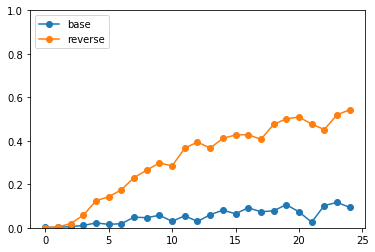

In [35]:
plt.plot(acc_list, '-o', label = 'base')
plt.plot(acc_list_rev, '-o', label = 'reverse')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

### Peeky Decoder

- 기존 seq2seq에서는 '입력 문장'을 Encoder가 $h$로 변환하여 Decoder에 전달하고  
Decoder의 최초 시점의 LSTM layer에서만 $h$를 이용함
- 중요 정보인 $h$를 Decoder의 여러 layer에서 사용하는 것이 Peeky Decoder
<br/> <img src='../figs/fig%207-26.png'> <br/>
- Decoder의 모든 시각($t$)의 Affine, LSTM layer에 $h$를 전달  
여러 layer가 중요 정보인 $h$를 공유함으로서 더 올바른 결정을 내림
- $h$에 대한 계산을 추가로 해줘야 하므로 

In [43]:
class PeekyDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        embed_W = (rn(V, D)/100).astype('f')
        # hidden 추가
        lstm_Wx = (rn(H + D, 4 * H) / np.sqrt(H + D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        #hidden 추가
        affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype('f')
        affine_b = np.zeros(V).astype('f')
        
        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)
        
        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        self.cache = None
        
    def forward(self, xs, h):
        N, T = xs.shape
        N, H = h.shape
        
        self.lstm.set_state(h)
        
        out = self.embed.forward(xs)
        # 추가된 hidden h와 기존에 전달되던 out을 concat
        hs = np.repeat(h, T, axis=0).reshape(N, T, H)
        out = np.concatenate((hs, out), axis=2)
        
        out = self.lstm.forward(out)
        # 위와 마찬가지로 h 추가
        out = np.concatenate((hs, out), axis=2)
        
        score = self.affine.forward(out)
        self.cache = H
        return score
    
    def backward(self, dscore):
        H = self.cache

        dout = self.affine.backward(dscore)
        # 추가된 h 반영
        dout, dhs0 = dout[:, :, H:], dout[:, :, :H]
        dout = self.lstm.backward(dout)
        # 추가된 h 반영2
        dembed, dhs1 = dout[:, :, H:], dout[:, :, :H]
        self.embed.backward(dembed)
        
        # 추가된 h 반영3
        dhs = dhs0 + dhs1
        dh = self.lstm.dh + np.sum(dhs, axis=1)
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.lstm.set_state(h)

        H = h.shape[1]
        peeky_h = h.reshape(1, 1, H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x)

            out = np.concatenate((peeky_h, out), axis=2)
            out = self.lstm.forward(out)
            out = np.concatenate((peeky_h, out), axis=2)
            score = self.affine.forward(out)

            char_id = np.argmax(score.flatten())
            sampled.append(char_id)

        return sampled        

In [44]:
class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()
        
        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads
    
    def forward(self, xs, ts):
        decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]
        h = self.encoder.forward(xs)
        score = self.decoder.forward(decoder_xs, h)
        loss = self.softmax.forward(score, decoder_ts)
        return loss
    
    def backward(self, dout=1):
        dout = self.softmax.backward(dout)
        dh = self.decoder.backward(dout)
        dout = self.encoder.backward(dh)
        return dout
    
    def generate(self, xs, start_id, sample_size):
        h = self.encoder.forward(xs)
        sampled = self.decoder.generate(h, start_id, sample_size)
        return sampled
        

peeky

In [45]:
# load data
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt', seed=1984)
#x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
char_to_id, id_to_char = sequence.get_vocab()

# hyper-parameter setting
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# model
model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

# 학습
acc_list_peeky = []

for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)
    
    correct_num = 0
    for i in range(len(x_test)):
        q, ans = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, q, ans, id_to_char, verbose)
        
    acc = float(correct_num) / len(x_test)
    acc_list_peeky.append(acc)
    print(f'accuracy : {round(acc*100)}%')

| epoch 1 |  itr 1/351 | time 0.039841651916503906[s] | loss 2.565519094467163
| epoch 1 |  itr 21/351 | time 0.5993442535400391[s] | loss 2.492949664592743
| epoch 1 |  itr 41/351 | time 1.12282133102417[s] | loss 2.2000244140625
| epoch 1 |  itr 61/351 | time 1.6460886001586914[s] | loss 1.9648204743862152
| epoch 1 |  itr 81/351 | time 2.178500175476074[s] | loss 1.8447694659233094
| epoch 1 |  itr 101/351 | time 2.7320199012756348[s] | loss 1.7998139917850495
| epoch 1 |  itr 121/351 | time 3.2705955505371094[s] | loss 1.7877581775188447
| epoch 1 |  itr 141/351 | time 3.803865909576416[s] | loss 1.7735841631889344
| epoch 1 |  itr 161/351 | time 4.369993686676025[s] | loss 1.7700916647911071
| epoch 1 |  itr 181/351 | time 4.922516822814941[s] | loss 1.7623382329940795
| epoch 1 |  itr 201/351 | time 5.480024337768555[s] | loss 1.7644251048564912
| epoch 1 |  itr 221/351 | time 6.056905031204224[s] | loss 1.7541425585746766
| epoch 1 |  itr 241/351 | time 6.582500696182251[s] | lo

Q 77+85  
T 162 
X 160 
---
Q 975+164
T 1139
X 1128
---
Q 582+84 
T 666 
X 650 
---
Q 8+155  
T 163 
X 160 
---
Q 367+55 
T 422 
X 404 
---
Q 600+257
T 857 
X 851 
---
Q 761+292
T 1053
X 1025
---
Q 830+597
T 1427
X 1400
---
Q 26+838 
T 864 
X 870 
---
Q 143+93 
T 236 
X 209 
---
accuracy : 5%
| epoch 6 |  itr 1/351 | time 0.046863555908203125[s] | loss 0.9987095594406128
| epoch 6 |  itr 21/351 | time 0.7248427867889404[s] | loss 0.9776063710451126
| epoch 6 |  itr 41/351 | time 1.4489078521728516[s] | loss 0.9741965413093567
| epoch 6 |  itr 61/351 | time 2.1491329669952393[s] | loss 0.9739347457885742
| epoch 6 |  itr 81/351 | time 2.8562421798706055[s] | loss 0.9628344088792801
| epoch 6 |  itr 101/351 | time 3.552380323410034[s] | loss 0.9516000747680664
| epoch 6 |  itr 121/351 | time 4.263906240463257[s] | loss 0.9492006659507751
| epoch 6 |  itr 141/351 | time 4.965030193328857[s] | loss 0.9515835165977478
| epoch 6 |  itr 161/351 | time 5.674150705337524[s] | loss 0.93230122029

| epoch 10 |  itr 281/351 | time 10.27197813987732[s] | loss 0.6091579169034957
| epoch 10 |  itr 301/351 | time 10.990058422088623[s] | loss 0.6084165394306182
| epoch 10 |  itr 321/351 | time 11.762603282928467[s] | loss 0.6101529628038407
| epoch 10 |  itr 341/351 | time 12.508907079696655[s] | loss 0.6068555980920791
Q 77+85  
T 162 
X 164 
---
Q 975+164
T 1139
X 1140
---
Q 582+84 
T 666 
X 668 
---
Q 8+155  
T 163 
X 161 
---
Q 367+55 
T 422 
O 422 
---
Q 600+257
T 857 
X 856 
---
Q 761+292
T 1053
X 1047
---
Q 830+597
T 1427
X 1428
---
Q 26+838 
T 864 
X 865 
---
Q 143+93 
T 236 
X 235 
---
accuracy : 19%
| epoch 11 |  itr 1/351 | time 0.03690028190612793[s] | loss 0.5733196139335632
| epoch 11 |  itr 21/351 | time 0.7659773826599121[s] | loss 0.5943080693483352
| epoch 11 |  itr 41/351 | time 1.5073597431182861[s] | loss 0.58463434278965
| epoch 11 |  itr 61/351 | time 2.208481788635254[s] | loss 0.5872677505016327
| epoch 11 |  itr 81/351 | time 2.9236154556274414[s] | loss 0.59

| epoch 15 |  itr 161/351 | time 6.208954095840454[s] | loss 0.4493880793452263
| epoch 15 |  itr 181/351 | time 6.986901760101318[s] | loss 0.45353189408779143
| epoch 15 |  itr 201/351 | time 7.790236949920654[s] | loss 0.4538502350449562
| epoch 15 |  itr 221/351 | time 8.599100351333618[s] | loss 0.45078643709421157
| epoch 15 |  itr 241/351 | time 9.395128726959229[s] | loss 0.45543352514505386
| epoch 15 |  itr 261/351 | time 10.27810001373291[s] | loss 0.47342189252376554
| epoch 15 |  itr 281/351 | time 11.058448791503906[s] | loss 0.47193105816841124
| epoch 15 |  itr 301/351 | time 11.853057146072388[s] | loss 0.4643804669380188
| epoch 15 |  itr 321/351 | time 12.577876806259155[s] | loss 0.4545693814754486
| epoch 15 |  itr 341/351 | time 13.32091236114502[s] | loss 0.45549852550029757
Q 77+85  
T 162 
X 163 
---
Q 975+164
T 1139
O 1139
---
Q 582+84 
T 666 
X 668 
---
Q 8+155  
T 163 
X 160 
---
Q 367+55 
T 422 
X 423 
---
Q 600+257
T 857 
X 856 
---
Q 761+292
T 1053
X 1048

| epoch 20 |  itr 41/351 | time 1.4135842323303223[s] | loss 0.3453711062669754
| epoch 20 |  itr 61/351 | time 2.119694232940674[s] | loss 0.3425628557801247
| epoch 20 |  itr 81/351 | time 2.840247631072998[s] | loss 0.33734683990478515
| epoch 20 |  itr 101/351 | time 3.5483524799346924[s] | loss 0.34064088463783265
| epoch 20 |  itr 121/351 | time 4.268446683883667[s] | loss 0.336163392663002
| epoch 20 |  itr 141/351 | time 4.971893787384033[s] | loss 0.33724673092365265
| epoch 20 |  itr 161/351 | time 5.731890678405762[s] | loss 0.3298293694853783
| epoch 20 |  itr 181/351 | time 6.462542533874512[s] | loss 0.3242053151130676
| epoch 20 |  itr 201/351 | time 7.18959903717041[s] | loss 0.33041820824146273
| epoch 20 |  itr 221/351 | time 7.930638551712036[s] | loss 0.3393643319606781
| epoch 20 |  itr 241/351 | time 8.648608684539795[s] | loss 0.33803734481334685
| epoch 20 |  itr 261/351 | time 9.395879983901978[s] | loss 0.33676801174879073
| epoch 20 |  itr 281/351 | time 10.1

| epoch 24 |  itr 341/351 | time 12.01695990562439[s] | loss 0.1567813627421856
Q 77+85  
T 162 
O 162 
---
Q 975+164
T 1139
O 1139
---
Q 582+84 
T 666 
O 666 
---
Q 8+155  
T 163 
X 164 
---
Q 367+55 
T 422 
O 422 
---
Q 600+257
T 857 
O 857 
---
Q 761+292
T 1053
X 1054
---
Q 830+597
T 1427
X 1430
---
Q 26+838 
T 864 
O 864 
---
Q 143+93 
T 236 
O 236 
---
accuracy : 76%
| epoch 25 |  itr 1/351 | time 0.039896249771118164[s] | loss 0.13877056539058685
| epoch 25 |  itr 21/351 | time 0.7270731925964355[s] | loss 0.14860835373401643
| epoch 25 |  itr 41/351 | time 1.4421610832214355[s] | loss 0.14641905017197132
| epoch 25 |  itr 61/351 | time 2.140293836593628[s] | loss 0.14492224380373955
| epoch 25 |  itr 81/351 | time 2.8374295234680176[s] | loss 0.14384270310401917
| epoch 25 |  itr 101/351 | time 3.6013851165771484[s] | loss 0.1445082925260067
| epoch 25 |  itr 121/351 | time 4.323480129241943[s] | loss 0.13916425071656705
| epoch 25 |  itr 141/351 | time 5.0435545444488525[s] | l

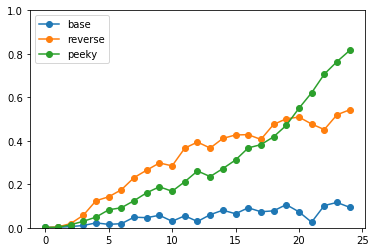

In [46]:
plt.plot(acc_list, '-o', label = 'base')
plt.plot(acc_list_rev, '-o', label = 'reverse')
plt.plot(acc_list_peeky, '-o', label = 'peeky')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

peeky + reversed

In [47]:
# load data
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt', seed=1984)
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
char_to_id, id_to_char = sequence.get_vocab()

# hyper-parameter setting
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# model
model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

# 학습
acc_list_peeky_rev = []

for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)
    
    correct_num = 0
    for i in range(len(x_test)):
        q, ans = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, q, ans, id_to_char, verbose)
        
    acc = float(correct_num) / len(x_test)
    acc_list_peeky_rev.append(acc)
    print(f'accuracy : {round(acc*100)}%')

| epoch 1 |  itr 1/351 | time 0.030917644500732422[s] | loss 2.5651278495788574
| epoch 1 |  itr 21/351 | time 0.562495231628418[s] | loss 2.4841060638427734
| epoch 1 |  itr 41/351 | time 1.0920794010162354[s] | loss 2.204221320152283
| epoch 1 |  itr 61/351 | time 1.6316628456115723[s] | loss 1.991376793384552
| epoch 1 |  itr 81/351 | time 2.213127613067627[s] | loss 1.8880881369113922
| epoch 1 |  itr 101/351 | time 2.759338140487671[s] | loss 1.823772370815277
| epoch 1 |  itr 121/351 | time 3.3278651237487793[s] | loss 1.8182687938213349
| epoch 1 |  itr 141/351 | time 3.881385326385498[s] | loss 1.79837965965271
| epoch 1 |  itr 161/351 | time 4.478788375854492[s] | loss 1.7885348916053772
| epoch 1 |  itr 181/351 | time 5.060476541519165[s] | loss 1.7753370642662047
| epoch 1 |  itr 201/351 | time 5.6239683628082275[s] | loss 1.7722214460372925
| epoch 1 |  itr 221/351 | time 6.186465501785278[s] | loss 1.7623690903186797
| epoch 1 |  itr 241/351 | time 6.788880109786987[s] | l

| epoch 5 |  itr 341/351 | time 12.391486406326294[s] | loss 0.8700307548046112
Q   58+77
T 162 
X 160 
---
Q 461+579
T 1139
X 1135
---
Q  48+285
T 666 
X 668 
---
Q   551+8
T 163 
X 169 
---
Q  55+763
T 422 
O 422 
---
Q 752+006
T 857 
X 861 
---
Q 292+167
T 1053
X 1045
---
Q 795+038
T 1427
X 1324
---
Q  838+62
T 864 
X 861 
---
Q  39+341
T 236 
X 239 
---
accuracy : 9%
| epoch 6 |  itr 1/351 | time 0.03989362716674805[s] | loss 0.8968499898910522
| epoch 6 |  itr 21/351 | time 0.7489972114562988[s] | loss 0.8551441222429276
| epoch 6 |  itr 41/351 | time 1.4571032524108887[s] | loss 0.8333203822374344
| epoch 6 |  itr 61/351 | time 2.1841821670532227[s] | loss 0.8366254776716232
| epoch 6 |  itr 81/351 | time 2.908290386199951[s] | loss 0.815820038318634
| epoch 6 |  itr 101/351 | time 3.644322156906128[s] | loss 0.809302818775177
| epoch 6 |  itr 121/351 | time 4.374370574951172[s] | loss 0.7956270754337311
| epoch 6 |  itr 141/351 | time 5.083472728729248[s] | loss 0.78948890268802

| epoch 10 |  itr 241/351 | time 9.026033639907837[s] | loss 0.15404507666826248
| epoch 10 |  itr 261/351 | time 9.736135005950928[s] | loss 0.14937030673027038
| epoch 10 |  itr 281/351 | time 10.437982559204102[s] | loss 0.14587533473968506
| epoch 10 |  itr 301/351 | time 11.174012422561646[s] | loss 0.14811275228857995
| epoch 10 |  itr 321/351 | time 11.906102180480957[s] | loss 0.14324994944036007
| epoch 10 |  itr 341/351 | time 12.637163162231445[s] | loss 0.13700467832386493
Q   58+77
T 162 
O 162 
---
Q 461+579
T 1139
O 1139
---
Q  48+285
T 666 
X 656 
---
Q   551+8
T 163 
O 163 
---
Q  55+763
T 422 
O 422 
---
Q 752+006
T 857 
O 857 
---
Q 292+167
T 1053
O 1053
---
Q 795+038
T 1427
O 1427
---
Q  838+62
T 864 
O 864 
---
Q  39+341
T 236 
O 236 
---
accuracy : 88%
| epoch 11 |  itr 1/351 | time 0.0359036922454834[s] | loss 0.12640124559402466
| epoch 11 |  itr 21/351 | time 0.7649762630462646[s] | loss 0.12977503873407842
| epoch 11 |  itr 41/351 | time 1.4780676364898682[s] 

| epoch 15 |  itr 101/351 | time 3.8504040241241455[s] | loss 0.04130422631278634
| epoch 15 |  itr 121/351 | time 4.572500705718994[s] | loss 0.037786708772182466
| epoch 15 |  itr 141/351 | time 5.288585186004639[s] | loss 0.03773187417536974
| epoch 15 |  itr 161/351 | time 6.014665126800537[s] | loss 0.042892100382596256
| epoch 15 |  itr 181/351 | time 6.71977972984314[s] | loss 0.04222034513950348
| epoch 15 |  itr 201/351 | time 7.4199254512786865[s] | loss 0.03678643917664885
| epoch 15 |  itr 221/351 | time 8.138999223709106[s] | loss 0.04042062889784574
| epoch 15 |  itr 241/351 | time 8.866079568862915[s] | loss 0.04226456116884947
| epoch 15 |  itr 261/351 | time 9.589146852493286[s] | loss 0.04414732251316309
| epoch 15 |  itr 281/351 | time 10.351108074188232[s] | loss 0.04587446106597781
| epoch 15 |  itr 301/351 | time 11.078162670135498[s] | loss 0.04869182519614697
| epoch 15 |  itr 321/351 | time 11.782280206680298[s] | loss 0.04495661091059446
| epoch 15 |  itr 341/

accuracy : 98%
| epoch 20 |  itr 1/351 | time 0.039893150329589844[s] | loss 0.017638685181736946
| epoch 20 |  itr 21/351 | time 0.7520110607147217[s] | loss 0.019656183011829854
| epoch 20 |  itr 41/351 | time 1.4990367889404297[s] | loss 0.01597324088215828
| epoch 20 |  itr 61/351 | time 2.2260913848876953[s] | loss 0.021294728247448803
| epoch 20 |  itr 81/351 | time 2.9671263694763184[s] | loss 0.023209993029013276
| epoch 20 |  itr 101/351 | time 3.7781691551208496[s] | loss 0.021225477568805218
| epoch 20 |  itr 121/351 | time 4.58301568031311[s] | loss 0.019341764366254212
| epoch 20 |  itr 141/351 | time 5.335024118423462[s] | loss 0.022651032777503133
| epoch 20 |  itr 161/351 | time 6.055117130279541[s] | loss 0.02777470853179693
| epoch 20 |  itr 181/351 | time 6.779205560684204[s] | loss 0.02954977136105299
| epoch 20 |  itr 201/351 | time 7.51723313331604[s] | loss 0.03175454633310437
| epoch 20 |  itr 221/351 | time 8.267227172851562[s] | loss 0.06839556731283665
| epoc

| epoch 24 |  itr 281/351 | time 10.157939195632935[s] | loss 0.01547595662996173
| epoch 24 |  itr 301/351 | time 10.897987604141235[s] | loss 0.02027306747622788
| epoch 24 |  itr 321/351 | time 11.66795825958252[s] | loss 0.01971474103629589
| epoch 24 |  itr 341/351 | time 12.434934377670288[s] | loss 0.026789224799722434
Q   58+77
T 162 
O 162 
---
Q 461+579
T 1139
O 1139
---
Q  48+285
T 666 
O 666 
---
Q   551+8
T 163 
O 163 
---
Q  55+763
T 422 
O 422 
---
Q 752+006
T 857 
O 857 
---
Q 292+167
T 1053
O 1053
---
Q 795+038
T 1427
O 1427
---
Q  838+62
T 864 
O 864 
---
Q  39+341
T 236 
O 236 
---
accuracy : 98%
| epoch 25 |  itr 1/351 | time 0.048868417739868164[s] | loss 0.01133718341588974
| epoch 25 |  itr 21/351 | time 0.826789379119873[s] | loss 0.01663709683343768
| epoch 25 |  itr 41/351 | time 1.5977716445922852[s] | loss 0.01728618801571429
| epoch 25 |  itr 61/351 | time 2.304879903793335[s] | loss 0.020831443509086965
| epoch 25 |  itr 81/351 | time 3.0599069595336914[s]

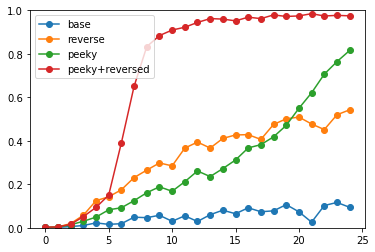

In [48]:
plt.plot(acc_list, '-o', label = 'base')
plt.plot(acc_list_rev, '-o', label = 'reverse')
plt.plot(acc_list_peeky, '-o', label = 'peeky')
plt.plot(acc_list_peeky_rev, '-o', label = 'peeky+reversed')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

## seq2seq을 이용하는 애플리케이션

seq2seq은 '한 시계열 데이터'를 '다른 시계열 데이터'로 변환하는 것
- 기계 번역 : '한 언어의 문장'을 '다른 언어의 문장'으로 변환
- 자동 요약 : '긴 문장'을 '짧게 요약한 문장'으로 변환
- 질의 응답 : '질문'을 '응답'으로 변환
- 메일 자동 응답 : '받은 메일의 문장'을 '답변 글'로 변환